# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from scipy.stats import norm

# EDA

## GoEmotions

In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

--2024-12-01 00:51:26--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv.2’

goemotions_1.csv.2  100%[===================>]  13.52M  63.5MB/s    in 0.2s    

2024-12-01 00:51:27 (63.5 MB/s) - ‘data/full_dataset/goemotions_1.csv.2’ saved [14174600/14174600]

--2024-12-01 00:51:27--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting r

In [ ]:
# Concatenate all parts
goemotions_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], axis=0).reset_index(drop=True)
print(goemotions_df.shape)
goemotions_df.head()

(211225, 37)


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Check for Missing and Duplicate Values
print("Missing values:", goemotions_df.isnull().sum().sum())
print("Duplicate values:", goemotions_df.duplicated().sum())
print("Duplicate comments:", goemotions_df.duplicated(subset=['id']).sum())
print("Unique comments:", goemotions_df['id'].nunique())

Missing values: 0
Duplicate values: 0
Duplicate comments: 153214
Unique comments: 58011


Duplicate comments because of different annotators

In [ ]:
# List of non-emotion columns
non_emotion_columns = ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
                       'created_utc', 'rater_id', 'example_very_unclear']

# Count the number of times each emotion is labeled
emotion_columns = [col for col in goemotions_df.columns if col not in non_emotion_columns]
emotion_counts = goemotions_df[emotion_columns].sum().sort_values(ascending=False)

In [ ]:
emotion_columns

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'disapproval',
 'disgust',
 'embarrassment',
 'excitement',
 'fear',
 'gratitude',
 'grief',
 'joy',
 'love',
 'nervousness',
 'optimism',
 'pride',
 'realization',
 'relief',
 'remorse',
 'sadness',
 'surprise',
 'neutral']

Combine labels from all annotators

In [ ]:
aggreageted_df = goemotions_df.groupby(['text','id'])[emotion_columns].max().reset_index()
aggreageted_df.head()

,text,id,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",ee3fxil,0,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,"""What do Scottish people look like?"" How I wo...",ee7cu0z,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,"### A surprise, to be sure, but a welcome one",edglo8q,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,"'*Pray*, v. To ask that the laws of the unive...",edcjn6t,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,">it'll get invaded by tankie, unfortunately. ...",eevxqzo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Distribution of Emotion Count per Entry

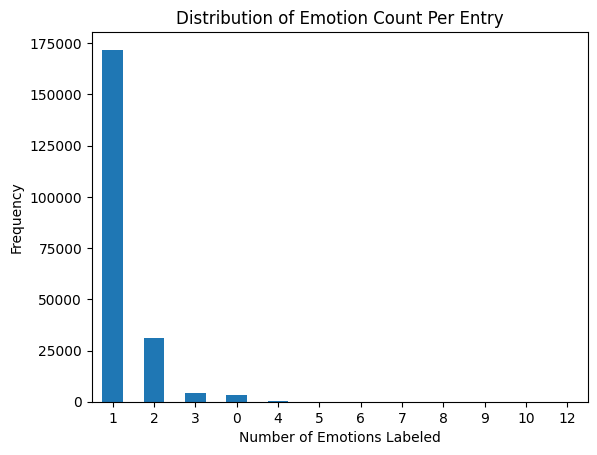

In [ ]:
goemotions_df[emotion_columns].sum(axis=1).value_counts().plot(kind='bar')
plt.title('Distribution of Emotion Count Per Entry')
plt.xlabel('Number of Emotions Labeled')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Distribution of Emotion Count per Unique Entry

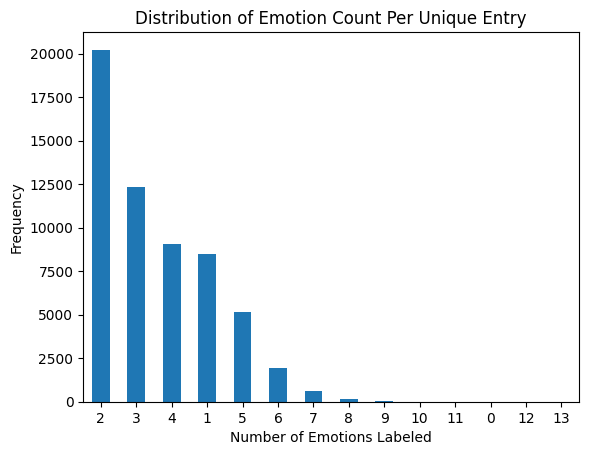

In [ ]:
aggreageted_df[emotion_columns].sum(axis=1).value_counts().plot(kind='bar')
plt.title('Distribution of Emotion Count Per Unique Entry')
plt.xlabel('Number of Emotions Labeled')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

### Distribution of Labels

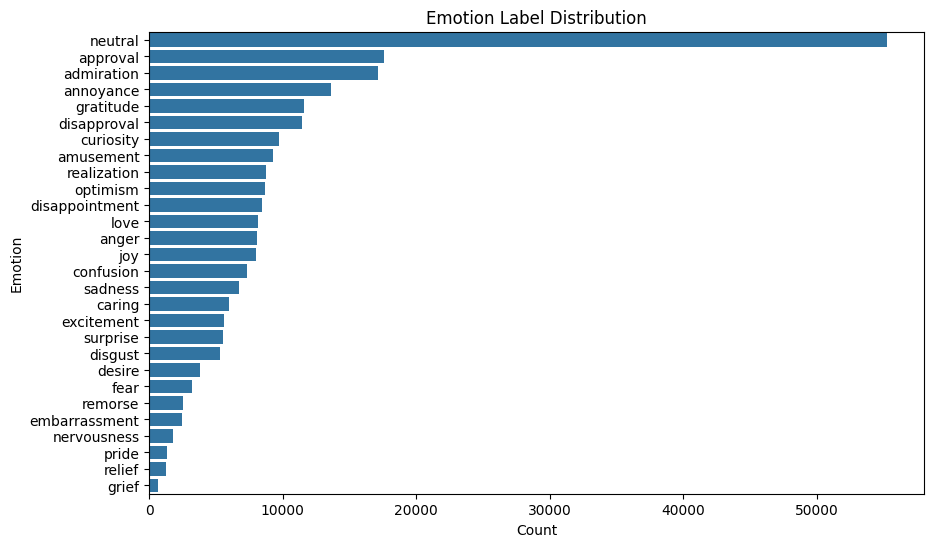

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=emotion_counts.index, x=emotion_counts.values)
plt.title('Emotion Label Distribution')
plt.ylabel('Emotion')
plt.xlabel('Count')
plt.yticks(rotation=0)
plt.show()

### Annotator

Annotator Uncertainty

In [ ]:
goemotions_df['example_very_unclear'].value_counts()

,count
example_very_unclear,
False,207814
True,3411


Annotator Agreement

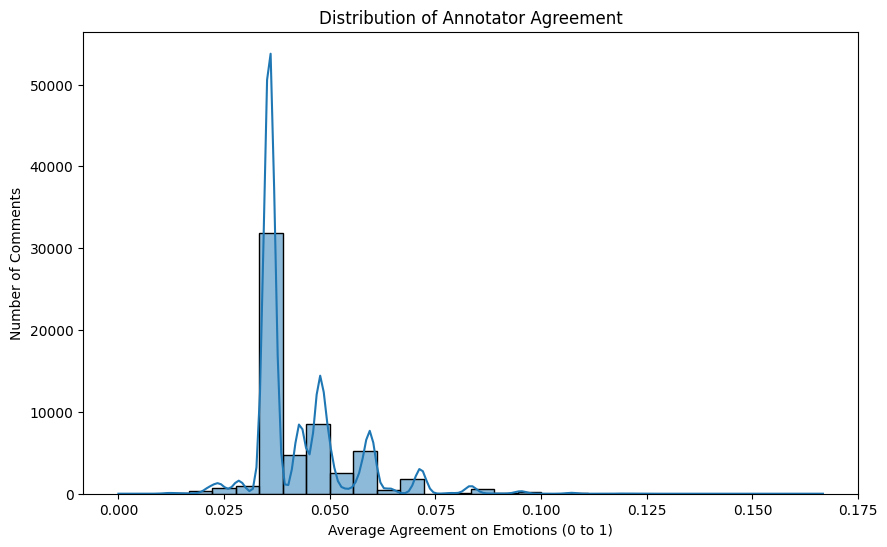

In [ ]:
# Group by comment id and calculate the mean label per comment
agreement = goemotions_df.groupby('id')[emotion_columns].mean()

# Plot distribution of agreement scores
plt.figure(figsize=(10, 6))
sns.histplot(agreement.mean(axis=1), bins=30, kde=True)
plt.title("Distribution of Annotator Agreement")
plt.xlabel("Average Agreement on Emotions (0 to 1)")
plt.ylabel("Number of Comments")
plt.show()

Annotator Bias

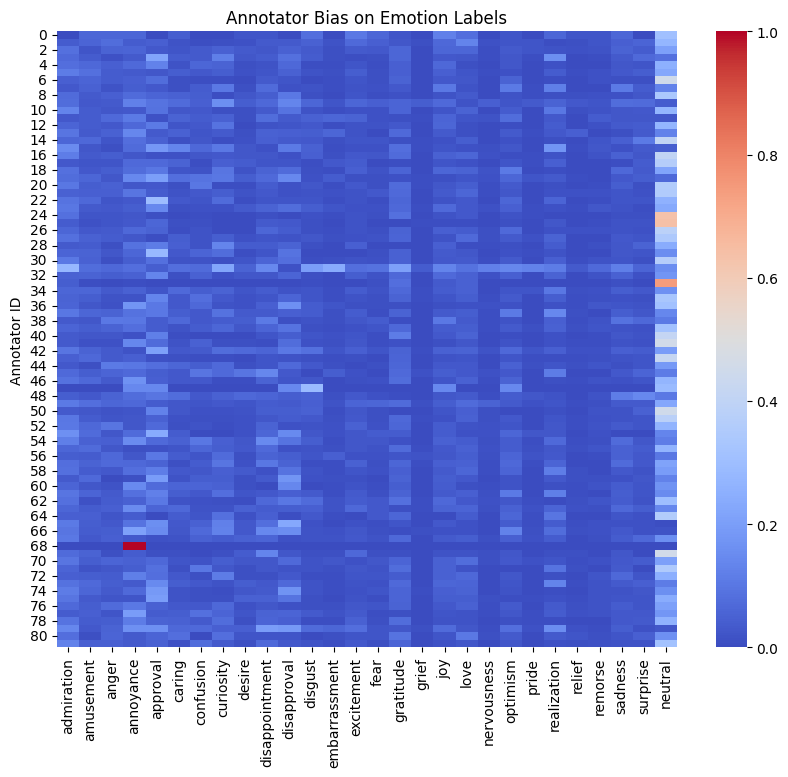

In [ ]:
# Group by rater_id and calculate mean label assignments per annotator
annotator_bias = goemotions_df.groupby('rater_id')[emotion_columns].mean()

# Plot heatmap of annotator bias
plt.figure(figsize=(10, 8))
sns.heatmap(annotator_bias, cmap="coolwarm")
plt.title("Annotator Bias on Emotion Labels")
plt.ylabel("Annotator ID")
plt.show()

In [ ]:
goemotions_df.rater_id.value_counts().sort_values(ascending=True)

,count
rater_id,
68,1
47,7
0,49
45,72
53,81
...,...
52,5397
2,5778
37,9161


### Correlation Matrix for Emotion

In [ ]:
# Calculate correlation matrix for emotion labels
emotion_corr = goemotions_df[emotion_columns].corr()

# Function to get the second max value greater than 0 and its index for each column
def second_max_info(column):
    # Filter out values less than or equal to 0
    filtered_values = column[column > 0]

    # If there are less than 2 unique values greater than 0, return NaN
    if len(filtered_values) < 2:
        return pd.Series({'Second Max': float('nan'), 'Index': None})

    # Get the two largest values greater than 0
    largest_values = filtered_values.nlargest(2)
    second_max = largest_values.iloc[-1]  # Second largest value
    index = largest_values.index[-1]       # Index of the second largest value
    return pd.Series({'Second Max': second_max, 'Index': index})

# Apply the function to each column and store the results in a Series
second_max_indices = emotion_corr.apply(second_max_info)
second_max_indices = second_max_indices.transpose()
percentile_25 = second_max_indices['Second Max'].quantile(0.25)
second_max_indices[second_max_indices['Second Max'] > percentile_25]

,Second Max,Index
admiration,0.028894,pride
anger,0.087398,annoyance
annoyance,0.087398,anger
confusion,0.051372,curiosity
curiosity,0.051372,confusion
desire,0.035473,optimism
disappointment,0.087218,sadness
disapproval,0.026134,disgust
disgust,0.032676,anger
embarrassment,0.035364,disappointment


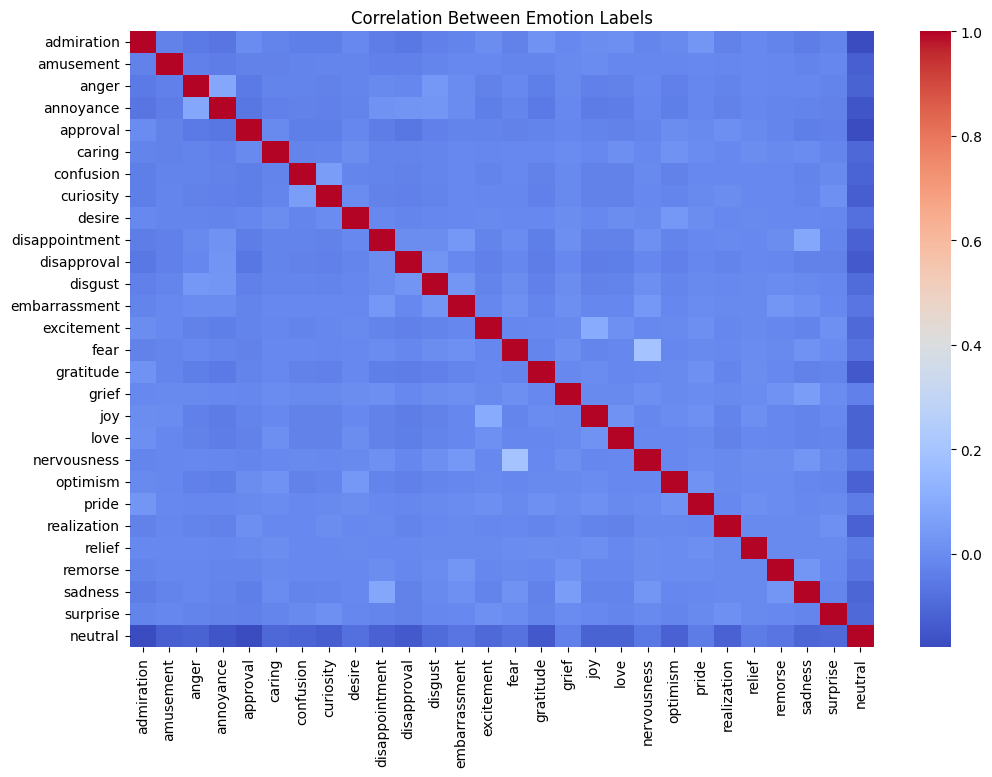

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(emotion_corr, annot=False, cmap='coolwarm')
plt.title("Correlation Between Emotion Labels")
plt.show()

### Text Length Analysis

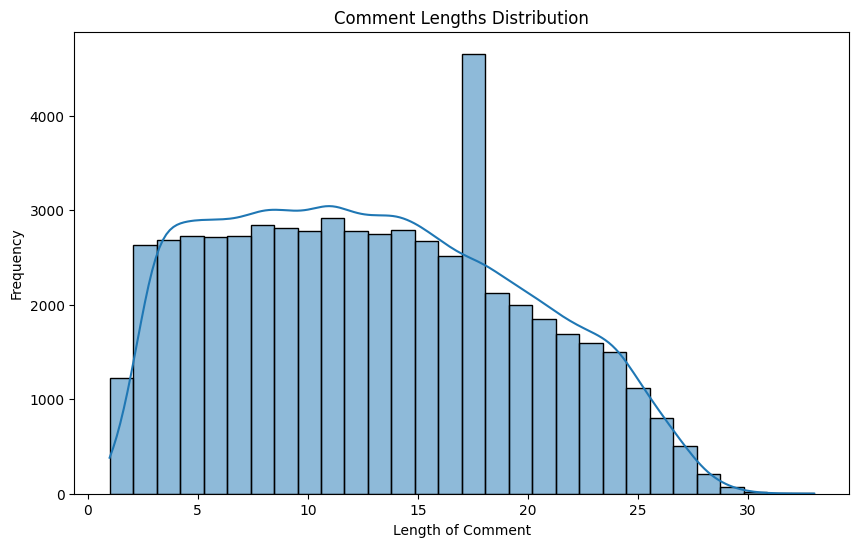

In [ ]:
drop_duplicates = goemotions_df.drop_duplicates(subset=['text'])
plt.figure(figsize=(10, 6))
sns.histplot(drop_duplicates['text'].apply(lambda x: len(x.split())), bins=30, kde=True)
plt.title('Comment Lengths Distribution')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# Example DataFrame (assuming journal_df is already defined with an 'Answer' column)
# Step 1: Calculate word count for each answer
goemotions_df['word_count'] = goemotions_df['text'].apply(lambda x: len(x.split()))

# Step 2: Compute Q1 (25th percentile) and Q3 (75th percentile) of the word counts
Q1 = goemotions_df['word_count'].quantile(0.25)
Q3 = goemotions_df['word_count'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Calculate the lower and upper boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower boundary for outliers:", lower_bound)
print("Upper boundary for outliers:", upper_bound)

Lower boundary for outliers: -9.5
Upper boundary for outliers: 34.5


### Word Cloud

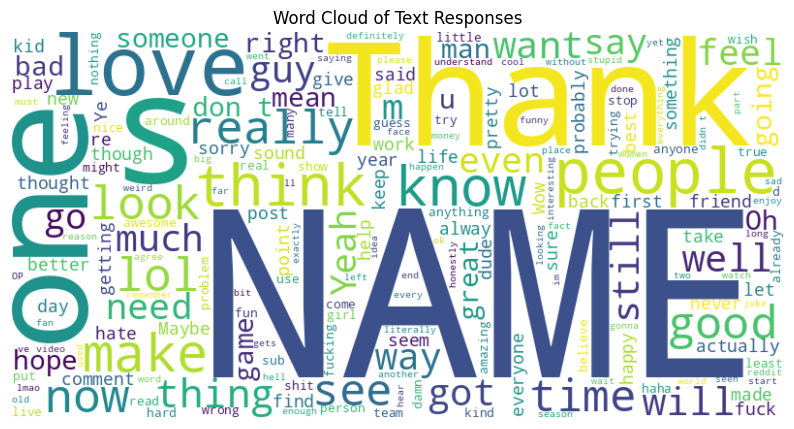

In [ ]:
text = ' '.join(drop_duplicates['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Responses')
plt.show()

### Simple Sentiment Analysis

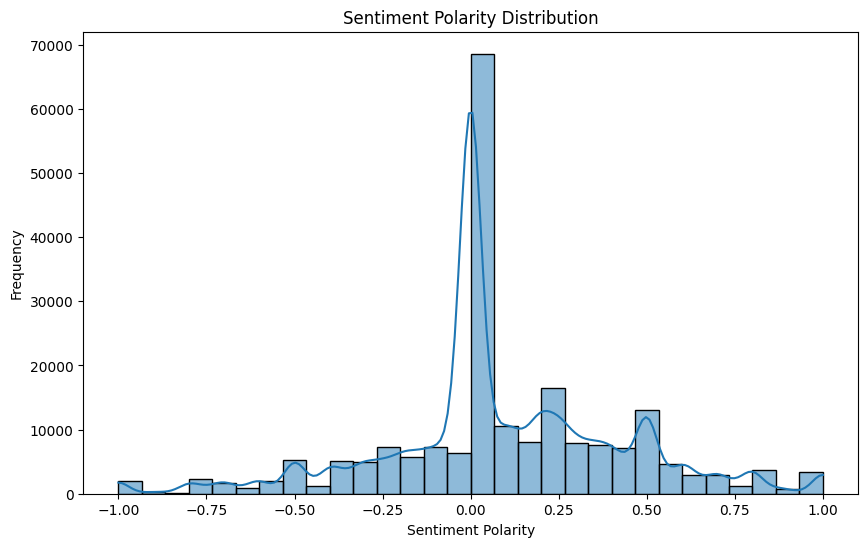

In [ ]:
# Perform sentiment analysis
goemotions_df['sentiment'] = goemotions_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(goemotions_df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## Journal Entries with Labelled Emotions

1473 observations, 18 emotions, 11 topics

In [ ]:
path = 'https://raw.githubusercontent.com/xaliceli/lemotif/refs/heads/master/assets/data/lemotif-data-cleaned-flat.csv'
journal_df = pd.read_csv(path)
journal_df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
journal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Answer                    1473 non-null   object
 1   Answer.f1.afraid.raw      1473 non-null   bool  
 2   Answer.f1.angry.raw       1473 non-null   bool  
 3   Answer.f1.anxious.raw     1473 non-null   bool  
 4   Answer.f1.ashamed.raw     1473 non-null   bool  
 5   Answer.f1.awkward.raw     1473 non-null   bool  
 6   Answer.f1.bored.raw       1473 non-null   bool  
 7   Answer.f1.calm.raw        1473 non-null   bool  
 8   Answer.f1.confused.raw    1473 non-null   bool  
 9   Answer.f1.disgusted.raw   1473 non-null   bool  
 10  Answer.f1.excited.raw     1473 non-null   bool  
 11  Answer.f1.frustrated.raw  1473 non-null   bool  
 12  Answer.f1.happy.raw       1473 non-null   bool  
 13  Answer.f1.jealous.raw     1473 non-null   bool  
 14  Answer.f1.nostalgic.raw 

In [ ]:
# Check for Missing and Duplicate Values
print("Missing values:", journal_df.isnull().sum().sum())
print("Duplicate entries:", journal_df.duplicated(subset=['Answer']).sum())

# Renaming columns
journal_df.columns = journal_df.columns.str.replace('Answer.', '').str.replace('.raw', '')

Missing values: 0
Duplicate entries: 0


In [ ]:
# Count the number of times each emotion is labeled
emotion_columns = [col for col in journal_df.columns if 'f1.' in col]
emotion_counts = journal_df[emotion_columns].sum().sort_values(ascending=False)

# Count the number of times each topic is labeled
topic_columns = [col for col in journal_df.columns if 't1.' in col]
topic_counts = journal_df[topic_columns].sum().sort_values(ascending=False)

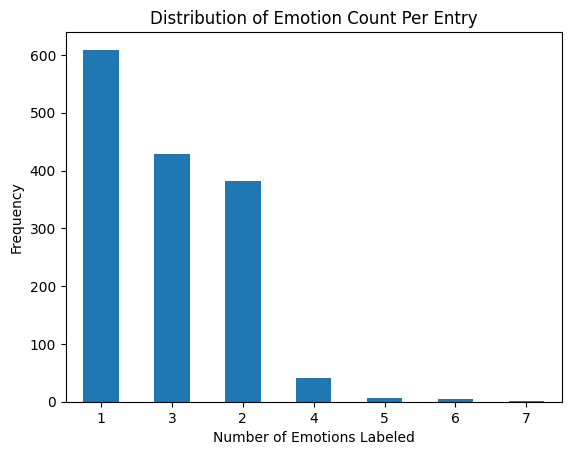

In [ ]:
# Count how many emotions are labeled per entry
journal_df[emotion_columns].sum(axis=1).value_counts().plot(kind='bar')
plt.title('Distribution of Emotion Count Per Entry')
plt.xlabel('Number of Emotions Labeled')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

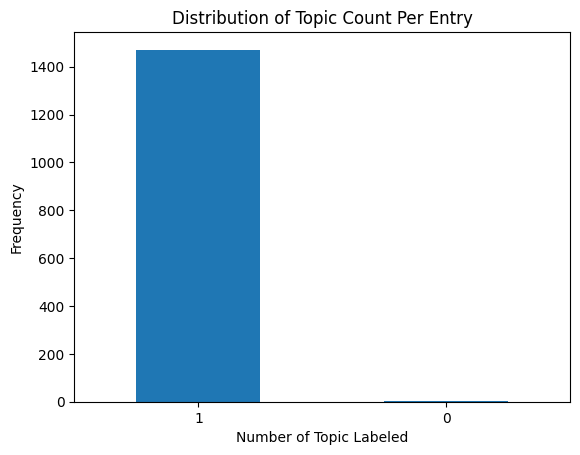

In [ ]:
# Count how many topics are labeled per entry
journal_df[topic_columns].sum(axis=1).value_counts().plot(kind='bar')
plt.title('Distribution of Topic Count Per Entry')
plt.xlabel('Number of Topic Labeled')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Check for rows without any emotions or topics
no_emotion = journal_df[journal_df[emotion_columns].sum(axis=1) == 0]
no_topic = journal_df[journal_df[topic_columns].sum(axis=1) == 0]

# Print the results
print(f"Number of entries without emotions: {no_emotion.shape[0]}")
print(f"Number of entries without topics: {no_topic.shape[0]}")

Number of entries without emotions: 0
Number of entries without topics: 2


### Distribution of Labels

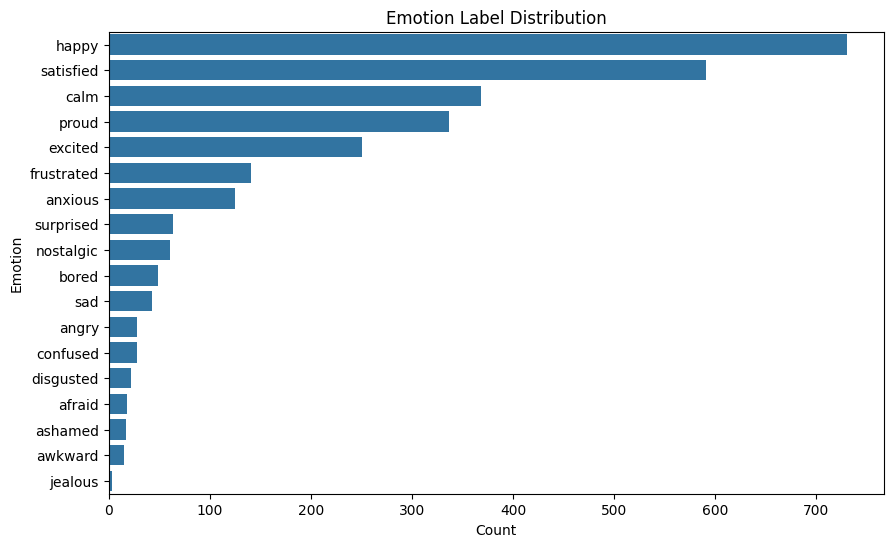

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=emotion_counts.index.str.replace('f1.', ''), x=emotion_counts.values)
plt.title('Emotion Label Distribution')
plt.ylabel('Emotion')
plt.xlabel('Count')
plt.show()

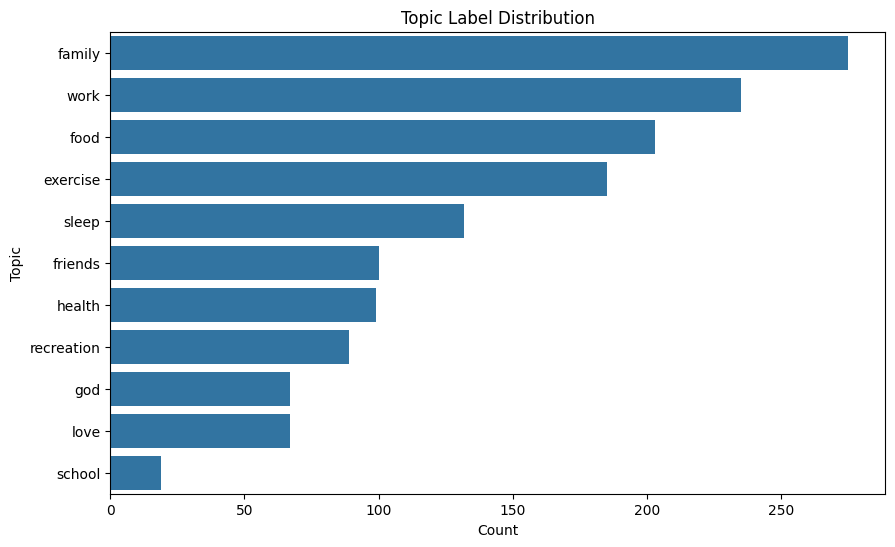

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(y=topic_counts.index.str.replace('t1.', ''), x=topic_counts.values)
plt.title('Topic Label Distribution')
plt.ylabel('Topic')
plt.xlabel('Count')
plt.show()

### Correlation between Emotions and Topics

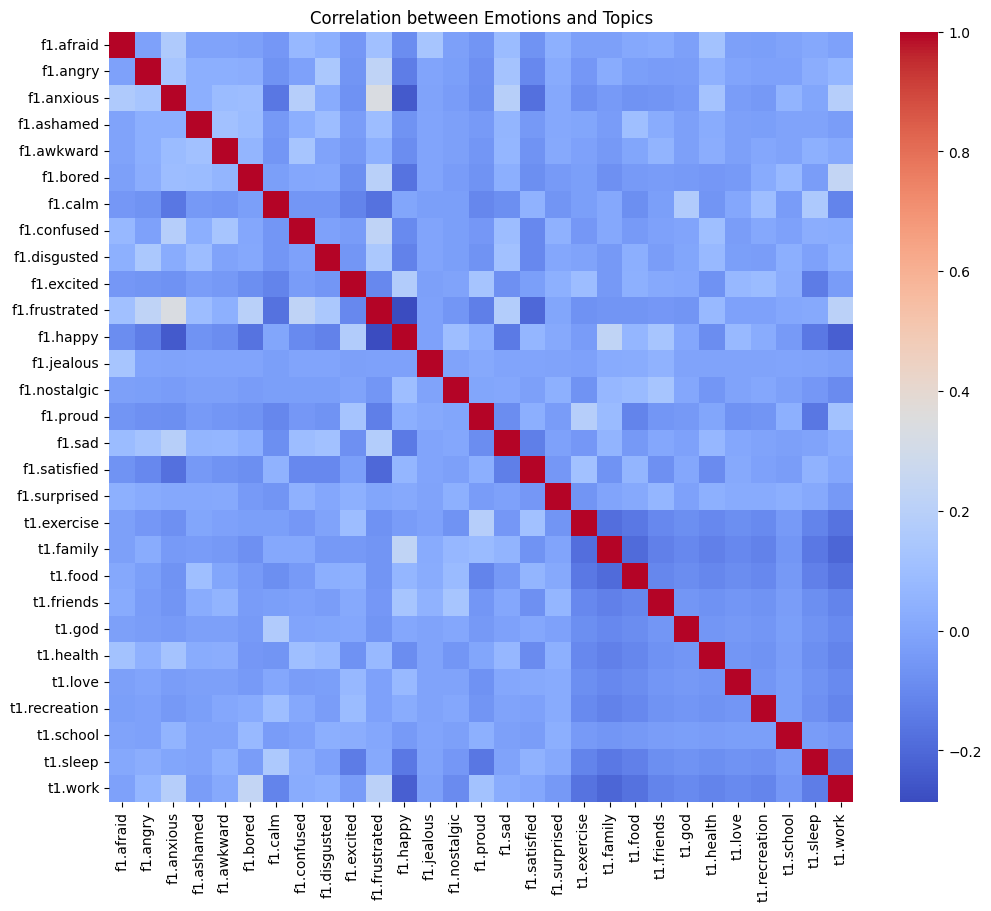

In [ ]:
# Calculate correlation between emotions and topics
corr_matrix = journal_df[emotion_columns + topic_columns].corr()

# Plot a heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation between Emotions and Topics')
plt.show()

### Text Length Analysis

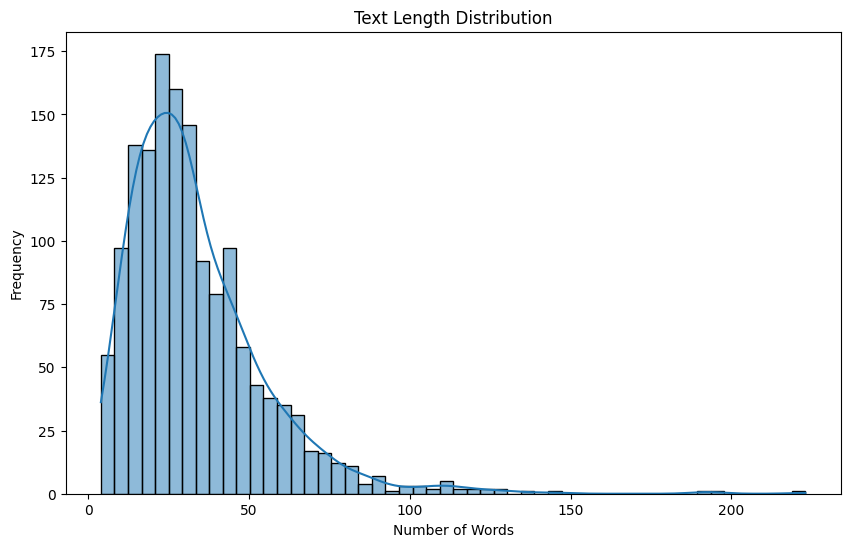

In [ ]:
# Plot text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(journal_df['Answer'].apply(lambda x: len(x.split())), kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# Example DataFrame (assuming journal_df is already defined with an 'Answer' column)
# Step 1: Calculate word count for each answer
journal_df['word_count'] = journal_df['Answer'].apply(lambda x: len(x.split()))

# Step 2: Compute Q1 (25th percentile) and Q3 (75th percentile) of the word counts
Q1 = journal_df['word_count'].quantile(0.25)
Q3 = journal_df['word_count'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Calculate the lower and upper boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower boundary for outliers:", Q1)
print("Upper boundary for outliers:", upper_bound)

Lower boundary for outliers: 19.0
Upper boundary for outliers: 79.0


### Word Cloud

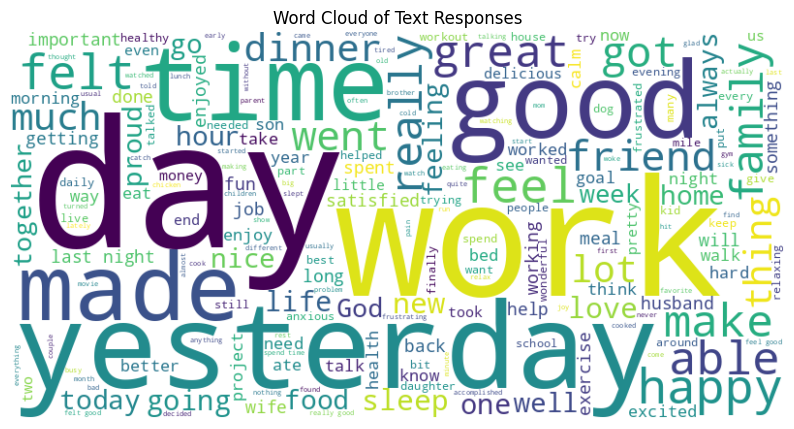

In [ ]:
text = ' '.join(journal_df['Answer'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Responses')
plt.show()

### Simple Sentiment Analysis

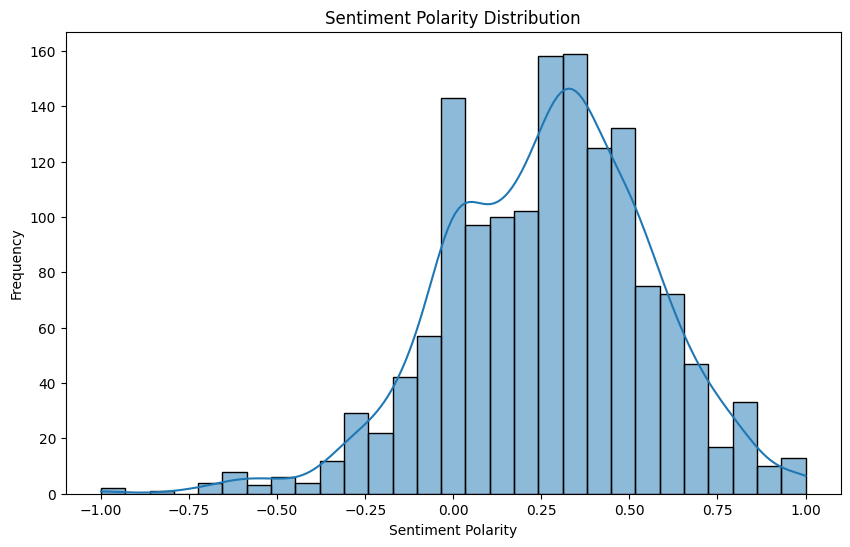

In [ ]:
# Perform sentiment analysis
journal_df['sentiment'] = journal_df['Answer'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(journal_df['sentiment'], kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()